<a href="https://colab.research.google.com/github/RajArPatra/project-oizys/blob/main/Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://raw.githubusercontent.com/facebookresearch/WavAugment/master/tests/test.wav > /dev/null

--2021-12-14 05:39:02--  https://raw.githubusercontent.com/facebookresearch/WavAugment/master/tests/test.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454764 (444K) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>] 444.11K  --.-KB/s    in 0.02s   

2021-12-14 05:39:02 (18.6 MB/s) - ‘test.wav’ saved [454764/454764]



In [ ]:
 
 # pick one file name:
 ###fName = '003_A_male_167Hz.wav'

from scipy.io import wavfile
import scipy
import librosa
#import wavfile
fName='/content/test.wav'
fs, signal = wavfile.read(fName)
print(signal.shape)
signal = signal / max(abs(signal))


(227360,)


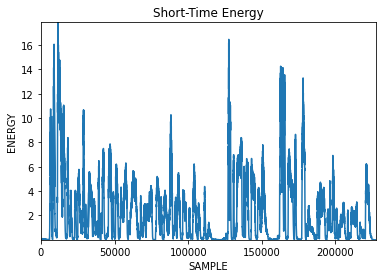

In [ ]:
plot_ste(signal,fs)

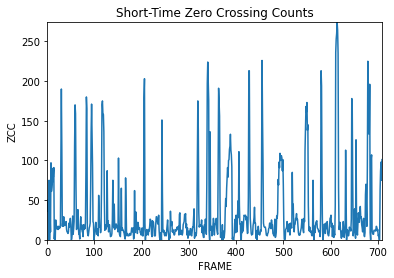

In [ ]:
plot_zcc(signal,fs)

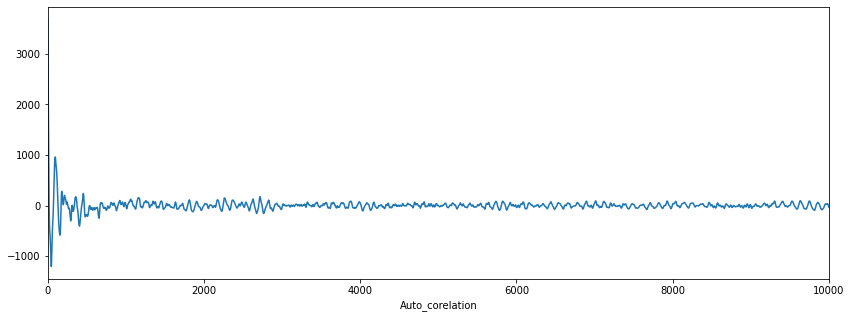

In [ ]:
plot_autocorelation(signal,fs)

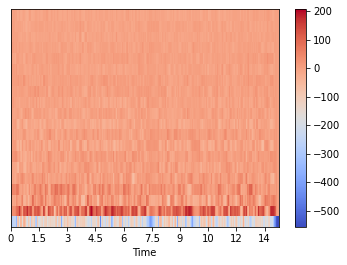

In [ ]:
plot_mfcc(signal,fs)

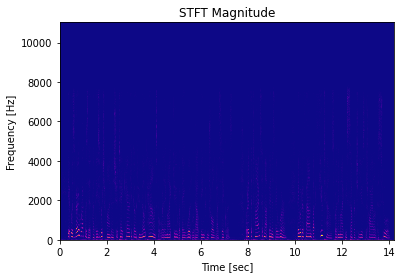

In [ ]:
plot_stft(signal,fs)

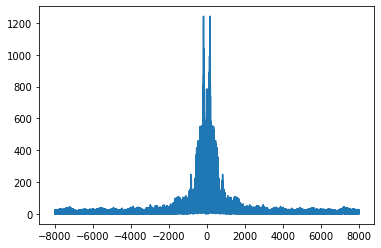

In [ ]:
fft_plot(signal,fs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_ste(signal,fs):
 fc = 20
 a = np.exp(-fc * 2 * np.pi / fs)
 STEs = []
 for n in range(len(signal)):
     if n == 0:
         STEs.append(a * 0 + signal[n] ** 2)           # base-case
     else:
         STEs.append(a * STEs[n - 1] + signal[n] ** 2)
 
 plt.plot(STEs)
 plt.title('Short-Time Energy')
 plt.ylabel('ENERGY')
 plt.xlabel('SAMPLE')
 plt.autoscale(tight='both')        

In [ ]:
def plot_zcc(signal,fs):
 DC = signal.mean()
 newSignal = signal - DC   
 assert fs % 1000 == 0
 
 sampsPerMilli = int(fs / 1000)
 millisPerFrame = 20
 sampsPerFrame = sampsPerMilli * millisPerFrame
 nFrames = int(len(signal) / sampsPerFrame) 

 ZCCs = []                                      # list of short-time zero crossing counts
 for i in range(nFrames):
     startIdx = i * sampsPerFrame
     stopIdx = startIdx + sampsPerFrame
     s = newSignal[startIdx:stopIdx]            # /s/ is the frame, named to correspond to the equation
     ZCC = 0
     for k in range(1, len(s)):
         ZCC += 0.5 * abs(np.sign(s[k]) - np.sign(s[k - 1]))
     ZCCs.append(ZCC)
 plt.plot(ZCCs)
 plt.title('Short-Time Zero Crossing Counts')
 plt.ylabel('ZCC')
 plt.xlabel('FRAME')
 plt.autoscale(tight='both')

In [ ]:
def plot_autocorelation(signal,fs):
  r = librosa.autocorrelate(signal, max_size=10000)
  plt.figure(figsize=(14, 5))
  plt.plot(r)
  plt.xlabel('Auto_corelation')
  plt.xlim(0, 10000)

In [ ]:
import scipy
from scipy.fftpack import fft,fftfreq
import numpy as np
def fft_plot (audio, sampling_rate):
  N = sampling_rate * librosa.get_duration(filename=fName)


  xf = fftfreq(int(N), 1 / sampling_rate)

 
  fft_out = fft(audio)
  plt.plot(xf, np.abs(fft_out))
  plt.show()


In [ ]:
def plot_stft(signal,fs):
  amp = 2 * np.sqrt(2)
  signal,fs=librosa.load(fName)
  f, t, Zxx = scipy.signal.stft(signal, fs, nperseg=1000)
  plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma')
  #plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='white')
  plt.title('STFT Magnitude')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

In [ ]:
import librosa.display
def plot_mfcc(signal,fs):
  mfccs = librosa.feature.mfcc(signal, sr=fs)
  img=librosa.display.specshow(mfccs, sr=fs, x_axis='time')
  plt.colorbar(img)